ASSIGNMENT 4

Submitted by Madhav A Nair 21BCE5128

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the Dataset

In [5]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

### 2. Data PreProcessing including Visualizations

### Univariate

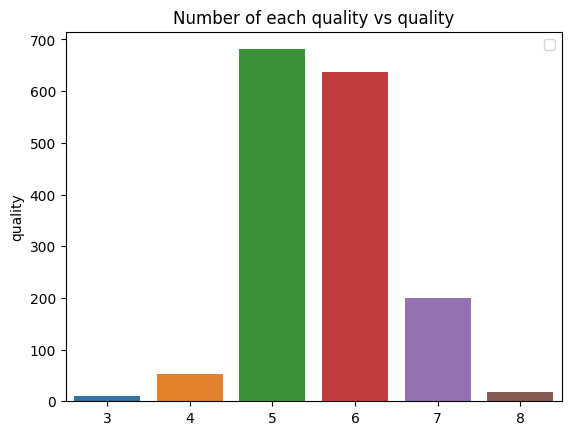

In [7]:
sns.barplot(x =df["quality"].value_counts().index,y =df["quality"].value_counts())
plt.title('Number of each quality vs quality')
plt.legend()
plt.show()

<ipython-input-14-e39af5e92528>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["volatile acidity"])


<Axes: xlabel='volatile acidity', ylabel='Density'>

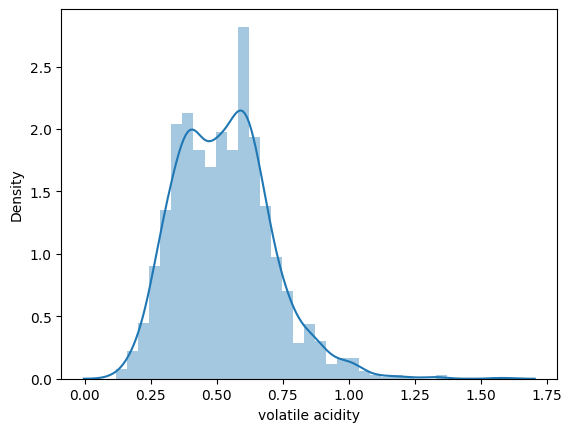

In [14]:
sns.distplot(df["volatile acidity"])

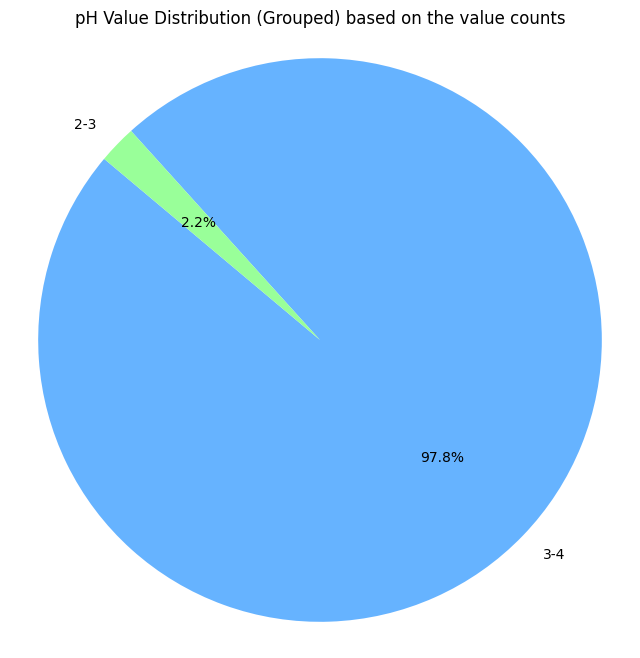

In [15]:
df['pH_category'] = pd.cut(df['pH'], bins=[2, 3, 4], labels=['2-3', '3-4'], include_lowest=True)
pH_category_counts = df['pH_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pH_category_counts, labels=pH_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99'])
plt.title('pH Value Distribution (Grouped) based on the value counts')
plt.axis('equal')
plt.show()
df = df.drop(columns=['pH_category'])


### Bivariate

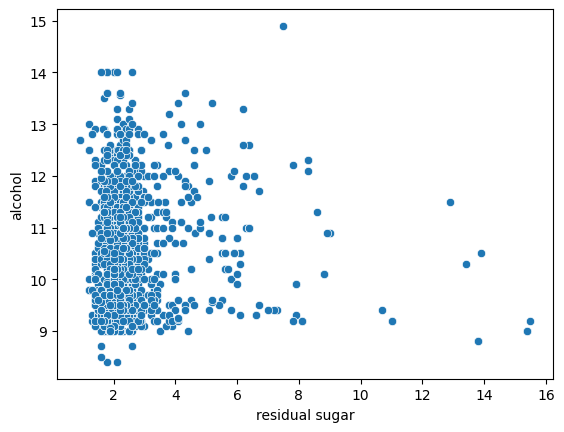

In [16]:
sns.scatterplot(x='residual sugar', y='alcohol', data=df)
plt.show()

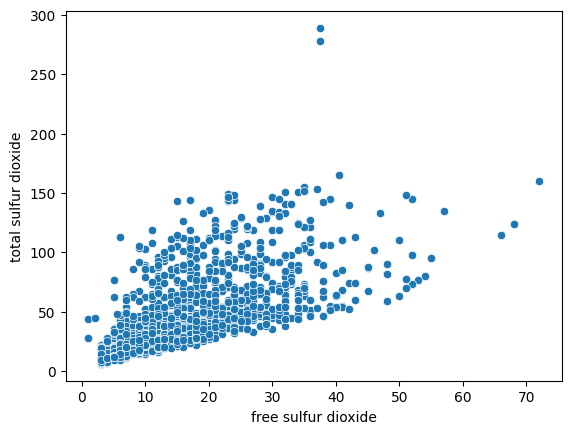

In [17]:
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df)
plt.show()

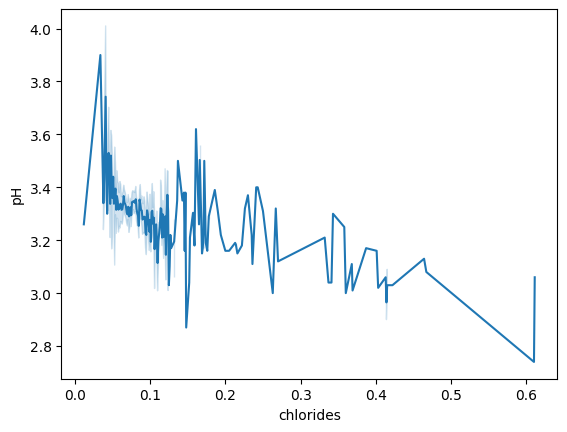

In [18]:
sns.lineplot(x='chlorides', y='pH', data=df)
plt.show()

### Multivariate

In [19]:
# sns.pairplot(df)

<Axes: >

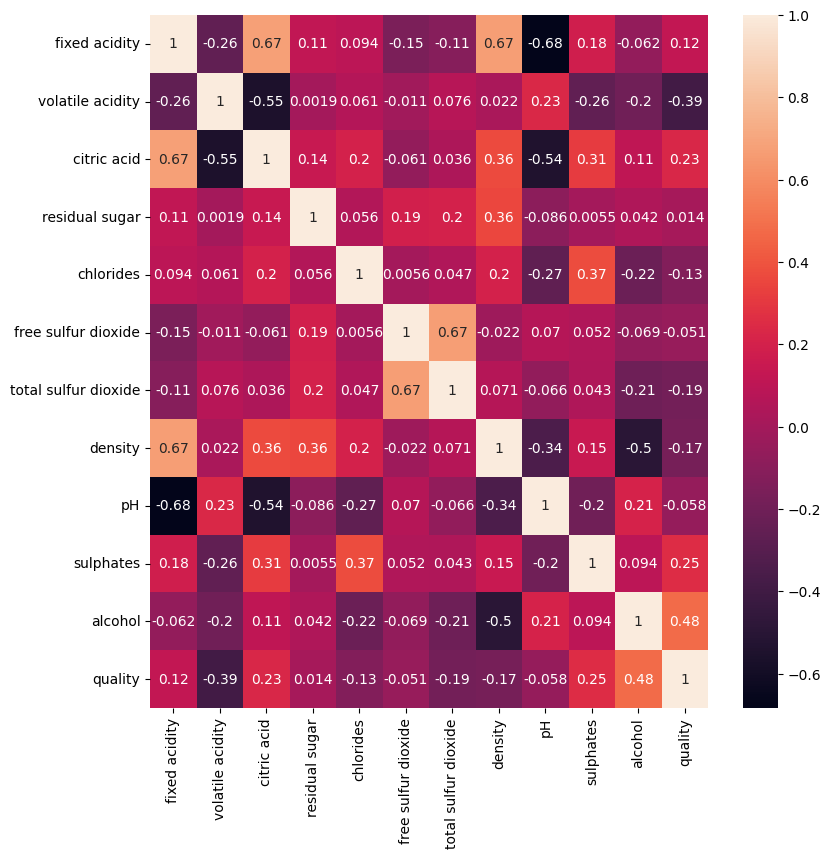

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)

#### Preprocessing

In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

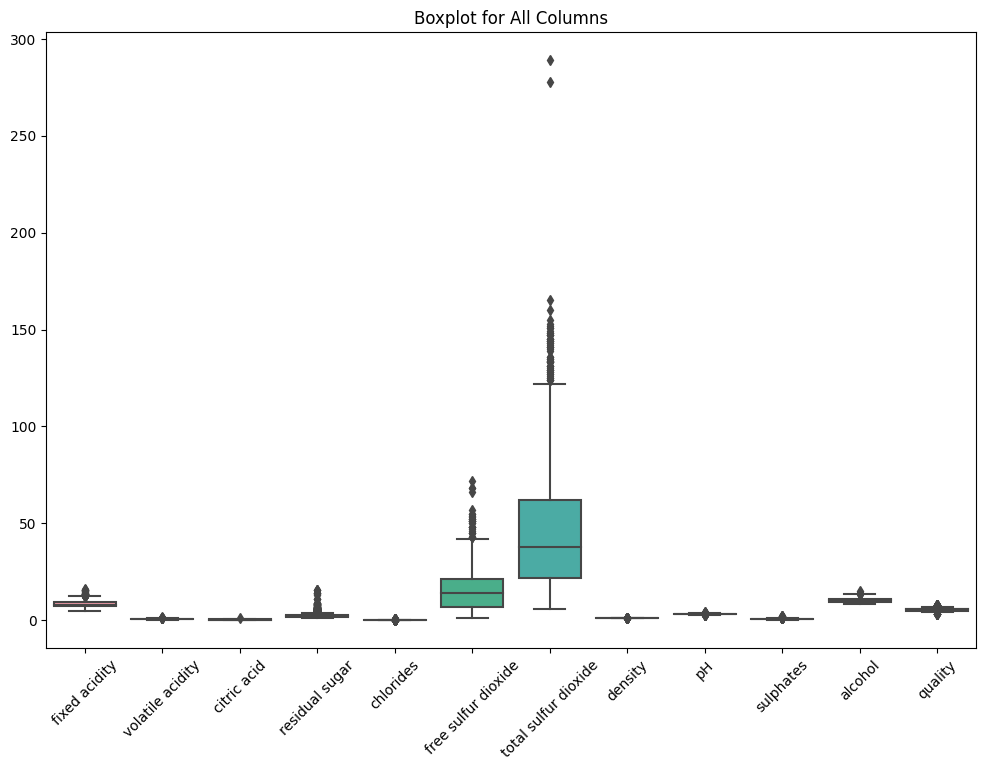

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns')
plt.show()

In [23]:
l=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

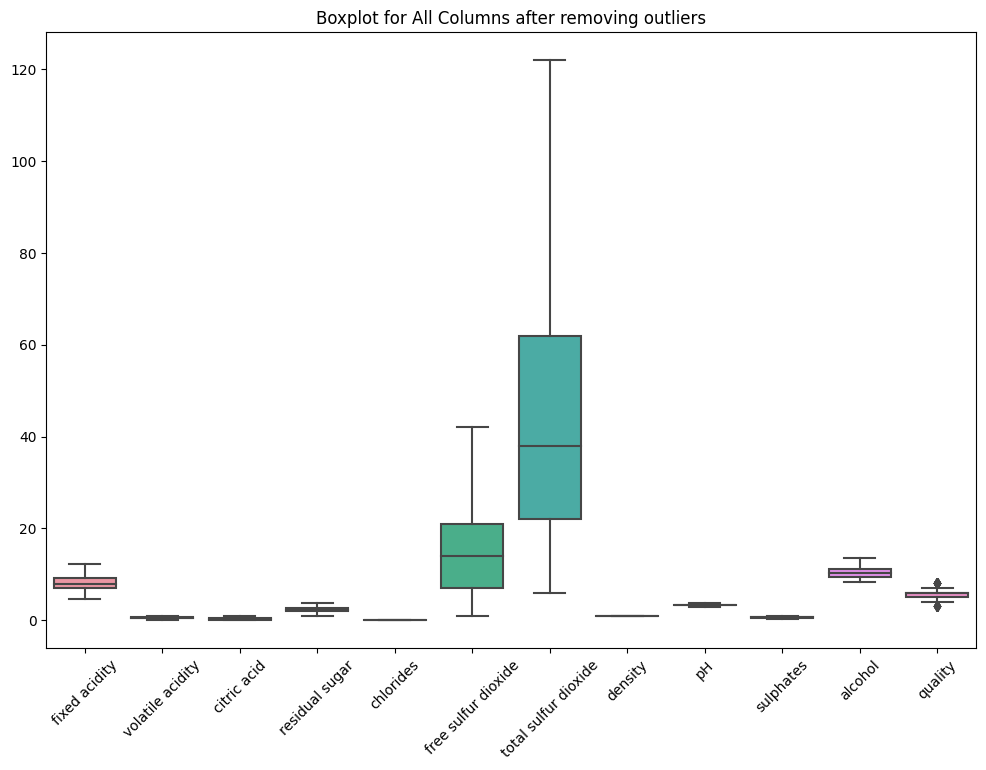

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns after removing outliers')
plt.show()

In [25]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [26]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950
1,-0.296555,2.032132,-1.392540,0.455672,0.943237,0.946759,0.700988,0.031853,-0.736650,0.220142,-0.587615
2,-0.296555,1.342438,-1.186940,-0.036694,0.606477,-0.070078,0.272857,0.142624,-0.336128,0.001232,-0.587615
3,1.757401,-1.416339,1.485857,-0.693182,-0.347676,0.133289,0.470456,0.696475,-1.003665,-0.509557,-0.587615
4,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


### 3. ML Model Building

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

#### Logistic Regression

In [31]:
logReg=LogisticRegression(max_iter=500)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

[6 5 5 6 5 7 6 6 5 5 6 5 5 5 5 4 6 6 5 5 5 6 6 5 5 6 6 6 6 5 5 5 6 6 6 5 7
 5 6 5 6 6 5 6 5 6 5 6 6 5 6 7 6 7 6 7 6 5 5 5 6 5 7 6 5 5 6 6 5 6 6 5 6 5
 5 5 5 6 6 6 6 5 6 5 6 6 6 5 6 5 7 6 7 5 6 6 5 5 6 6 6 5 5 6 6 6 5 6 6 5 5
 6 5 5 5 5 5 5 6 6 6 5 6 5 6 5 5 5 5 5 5 5 4 6 5 7 6 5 5 6 6 6 5 6 5 6 6 5
 5 6 5 6 6 6 5 5 6 5 6 7 6 6 7 6 6 6 7 7 6 6 6 7 6 7 5 5 6 5 5 6 6 6 6 6 5
 5 6 7 5 5 5 5 6 6 5 6 5 6 7 6 6 6 6 5 5 5 6 5 5 7 5 6 6 5 6 5 6 5 5 5 6 7
 5 6 7 5 6 6 5 5 5 6 5 6 5 6 5 5 5 5 5 6 6 7 6 6 5 5 6 6 5 6 5 5 5 5 7 7 7
 6 6 5 6 5 6 6 5 7 6 5 5 6 6 6 5 5 5 5 6 5 6 6 6 6 6 5 6 6 5 6 6 5 7 6 5 6
 5 6 5 6 6 6 6 7 6 7 5 7 6 5 6 5 6 5 6 7 7 7 5 6 6 6 6 7 6 6 6 5 5 5 6 7 6
 7 5 5 5 5 5 5 6 5 6 7 5 5 7 5 5 6 5 5 6 5 5 6 6 6 6 5 5 6 6 6 5 5 6 6 6 6
 6 5 6 6 6 7 6 5 5 6 6 5 6 5 5 6 5 6 6 6 6 6 7 6 5 5 5 6 5 6 5 6 5 5 5 5 7
 6 6 6 6 5 5 5 5 6 5 6 7 7 6 5 6 5 5 6 5 6 5 6 6 5 6 6 5 7 6 6 6 5 5 6 5 5
 6 5 5 6 5 5 7 5 6 5 5 6 5 6 6 6 6 5 6 7 7 6 6 6 7 5 5 5 5 7 5 5 5 5 5 5]
              precision   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Evaluate Model

In [32]:
y_pred_train = logReg.predict(X_train)
print('Testing Accuracy for LogisticRegression = ', accuracy_score(y_test,y_pred))
print('Training Accuracy for LogisticRegression = ', accuracy_score(y_train,y_pred_train))

Testing Accuracy for LogisticRegression =  0.5541666666666667
Training Accuracy for LogisticRegression =  0.6184092940125112


In [33]:
print("classification report for Logistic regression Classifier ")
print(classification_report(y_test,y_pred))

classification report for Logistic regression Classifier 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.67      0.67      0.67       210
           6       0.48      0.57      0.52       183
           7       0.42      0.34      0.38        58
           8       0.00      0.00      0.00        11

    accuracy                           0.55       480
   macro avg       0.26      0.27      0.26       480
weighted avg       0.53      0.55      0.54       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Test with random Observation

In [34]:
predicting_sample = [[8.9,	0.38, 0.40,	 2.2,	0.068,	12.0,	28.0,	0.99486,	3.27,	0.75,	12.6],
					[8.1,	0.38, 0.28,	 2.1,	0.066,	13.0,	30.0,	0.99680,	3.23,	0.73,	9.7],
					[12.35,	0.300, 0.31, 1.80,	0.078,	18.0,	88.0,	0.99590,	3.44,	0.78,	12.3],
					[8.6,	0.42, 0.39,	 1.8,	0.068,	6.0	,	12.0,	0.99516,	3.35,	0.69,	11.7],
					[7.6,	0.420, 0.08, 2.7,	0.084,	15.0,	48.0,	0.99680,	3.21,	0.59,	10.0],
					[8.8,	0.600, 0.29, 2.2,	0.098,	5.0	,	15.0,	0.99880,	3.36,	0.49,	9.1]]

In [35]:
for i in predicting_sample:
    x=logReg.predict([i])
    print(x)

[5]
[5]
[5]
[7]
[5]
[7]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid